
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_amarillo@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio A/B Testing Parametrico

⚠️ Recuerda en caso de que los resultados no sean suficientes una imagen vale mas que mil palabras 


#### Ejercicio 1:  Linea de montaje 

En una fabrica de componenetes textil se quiere comparar el tiempo de fabricacion de un determinado producto mediante tres métodos diferentes. Cada uno de los metodos se realizan en maquinas distintas. Se seleccionan aleatoriamente productos elaborados con cada uno de los métodos y se observa el tiempo de fabricación.  Si los tiempos de fabricacion son negativos significara que las maquinas estuvieron paradas esos minutos. 



1. ¿Se verifican los supuestos del modelo de análisis de la varianza?

2. ¿Existe evidencia de que el método influye en el tiempo medio de elaboración del producto?

3. La empresa valora que el tiempo de fabricación sea el menor posible. ¿Qué método cree que ofrece mejores resultados?

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Calcular el tamaño muestral
# -----------------------------------------------------------------------
from statsmodels.stats.power import NormalIndPower
import statsmodels.stats.api as sms


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Importamos las funciones del archivo de soporte
# ------------------------------------------------------------------------------
from src import soporte_abtesting as sa


# Otros recursos
# ------------------------------------------------------------------------------
import math

# Configuración de las gráficas
# ------------------------------------------------------------------------------
# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("dark")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en seaborn-v0_8-darkgrid. 
plt.style.use('dark_background')

import warnings
warnings.filterwarnings("ignore")

In [15]:
# carga un archivo csv llamado 'linea_montaje.csv' desde la carpeta 'datos' y lo almacena en un dataframe
df = pd.read_csv('datos/linea_montaje.csv')

# muestra las primeras 5 filas del dataframe para inspeccionar su contenido
df.head()

,minutos,metodo
0,4.166484,A
1,4.887466,A
2,0.727608,A
3,8.280542,A
4,1.413129,A


In [16]:
# realiza una exploración del dataframe 'df' utilizando la columna 'metodo' como criterio de análisis
sa.exploracion_dataframe(df, 'metodo')

El número de datos es 150 y el de columnas es 2

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
minutos,float64
metodo,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna METODO tiene las siguientes valore únicos:


,count
metodo,
A,50
B,50
C,50



 ..................... 

Los principales estadísticos de las columnas categóricas para el A son: 


,count,unique,top,freq
metodo,50,1,A,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el A son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.720512,2.102454,0.130465,3.312806,4.690071,6.005251,9.584416



 ..................... 

Los principales estadísticos de las columnas categóricas para el B son: 


,count,unique,top,freq
metodo,50,1,B,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el B son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.364523,2.085242,-0.818899,3.597334,4.506685,5.825817,7.668974



 ..................... 

Los principales estadísticos de las columnas categóricas para el C son: 


,count,unique,top,freq
metodo,50,1,C,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el C son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,5.600274,2.329937,1.334696,4.071824,5.064969,6.976655,12.059491


In [17]:
# imprime un mensaje indicando la cantidad de usuarios duplicados en el dataframe
print(f"tenemos un total de {df.duplicated(subset='metodo').sum()} usuarios repetidos")

tenemos un total de 147 usuarios repetidos


,mean,std
metodo,,
A,4.720512,2.102454
B,4.364523,2.085242
C,5.600274,2.329937


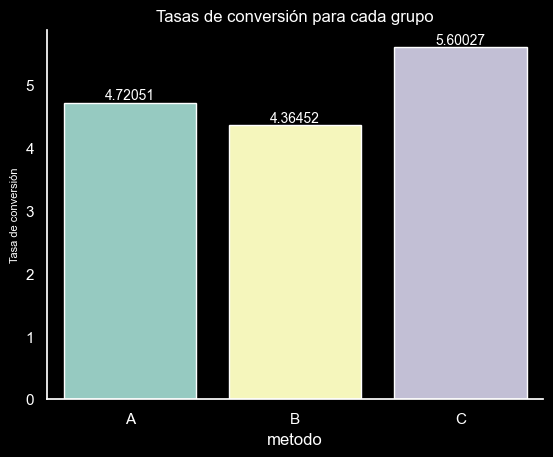

In [18]:
# calcula la media y la desviación estándar de la columna 'minutos', agrupando por 'metodo'
ratio_conversion = df.groupby('metodo')['minutos'].agg(["mean", "std"])

# muestra el resultado de la agregación en formato tabular
display(ratio_conversion)

# crea un gráfico de barras para visualizar la media de 'minutos' por grupo de 'metodo'
fig = sns.barplot(
    data=ratio_conversion.reset_index(),  # se asegura que 'metodo' esté disponible como columna
    x='metodo',  # eje x corresponde a los grupos ('metodo')
    y='mean'     # eje y corresponde a la media calculada
)

# añade etiquetas en las barras con los valores correspondientes
fig.bar_label(fig.containers[0], fontsize=10)

# oculta las líneas superiores y derechas del gráfico para una apariencia más limpia
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

# establece el título del gráfico
fig.set_title("Tasas de conversión para cada grupo")

# establece la etiqueta del eje y con un tamaño de fuente ajustado
fig.set_ylabel("Tasa de conversión", fontsize=8)

# muestra el gráfico
plt.show()

In [19]:
# crea una instancia de la clase Pruebas_parametricas para realizar un análisis ANOVA
anova = sa.Pruebas_parametricas("metodo", "minutos", df)

# realiza el análisis ANOVA para comprobar si existen diferencias significativas entre los grupos
anova.test_anova()

Estadístico F: 4.275128289148849
Valor p: 0.015679251126397998
El p-valor de la prueba es 0.02, por lo tanto, hay diferencias significativas entre los grupos.


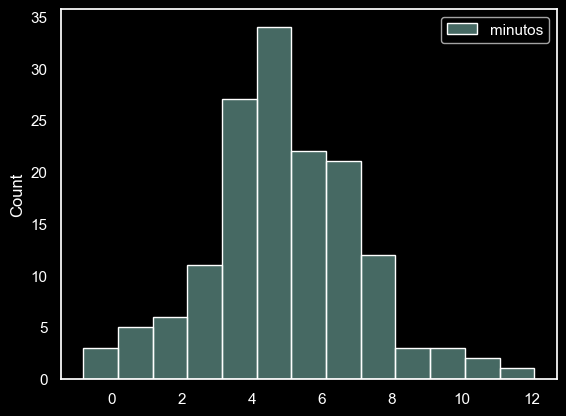

In [20]:
# crea un histograma para visualizar la distribución de los datos del dataframe completo
sns.histplot(df)

# muestra el histograma generado
plt.show()

#### Ejercicio 2: Densidad de Fluidos 


La convección es un mecanismo fundamental de transferencia de calor en fluidos, que ocurre debido a las variaciones en la densidad provocadas por diferencias de temperatura. Este fenómeno se manifiesta cuando las porciones del fluido que se calientan, al volverse menos densas, ascienden hacia regiones de menor temperatura, mientras que las porciones más frías, al ser más densas, descienden hacia las zonas donde la temperatura es más alta. Este movimiento continuo da lugar a las llamadas corrientes de convección, las cuales desempeñan un papel crucial en la distribución homogénea de la temperatura dentro del fluido, promoviendo un equilibrio térmico.

En este contexto, se ha diseñado y ejecutado un experimento con el propósito de investigar cómo se ve afectada la densidad de un fluido cuando se incrementa la temperatura en una región específica del sistema; por tanto se asegura la independencia y aleatoriedad del mismo. El objetivo del experimento es comprender en detalle las modificaciones en la densidad que resultan de este aumento térmico y cómo estas afectan el comportamiento global del fluido.


1. Analiza las suposiciones del modelo: ¿Se cumplen las condiciones de homocedasticidad, independencia y normalidad?
2. ¿Tiene la temperatura un impacto notable en la densidad del fluido?
3. ¿Es posible concluir que las temperaturas de 100 y 125 provocan, en promedio, una menor densidad en el fluido comparadas con las temperaturas de 150 y 175?

In [21]:
# carga el archivo csv llamado 'densidad_fluidos.csv' desde la carpeta 'datos' y lo almacena en un dataframe llamado df_2
df_2 = pd.read_csv('datos/densidad_fluidos.csv')

In [22]:
# muestra las primeras 5 filas del dataframe df_2 para inspeccionar rápidamente su estructura y contenido
df_2.head()

,temperatura,densidad
0,100,21.790655
1,100,21.725900
2,100,21.806052
3,100,21.895319
4,100,21.716121


In [23]:
# muestra los tipos de datos de cada columna en el dataframe df_2
df_2.dtypes

temperatura      int64
densidad       float64
dtype: object

In [24]:
# convierte la columna 'temperatura' del dataframe df_2 al tipo de datos object
df_2['temperatura'].astype(object)

0      100
1      100
2      100
3      100
4      100
      ... 
395    175
396    175
397    175
398    175
399    175
Name: temperatura, Length: 400, dtype: object

Para la columna densidad, los datos siguen una distribución normal según el test de Shapiro-Wilk.
Para la columna densidad, los datos siguen una distribución normal según el test de Shapiro-Wilk.
Para la columna densidad, los datos siguen una distribución normal según el test de Shapiro-Wilk.
Para la columna densidad, los datos siguen una distribución normal según el test de Shapiro-Wilk.


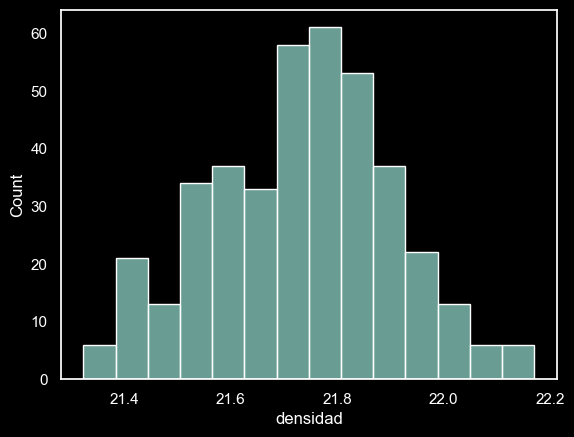

In [25]:
# itera sobre los valores únicos de la columna 'temperatura' en el dataframe df_2
for i in df_2['temperatura'].unique():
    # filtra el dataframe para obtener únicamente las filas correspondientes al valor actual de 'temperatura'
    subset = df_2[df_2['temperatura'] == i]
    
    # crea una instancia de la clase Asunciones para evaluar normalidad en la columna 'densidad'
    normalidad = sa.Asunciones(subset, "densidad")
    
    # realiza la prueba de normalidad de Shapiro-Wilk con un nivel de significancia de 0.05
    # muestra información detallada del análisis si verbose=True
    normalidad.identificar_normalidad_analitica(metodo="shapiro", alpha=0.05, verbose=True)

# crea un histograma para visualizar la distribución de los valores en la columna 'densidad'
sns.histplot(df_2['densidad'])

# muestra el histograma generado
plt.show()

In [26]:
# crea una instancia de la clase Asunciones para analizar la columna 'densidad' en el dataframe df_2
homo = sa.Asunciones(df_2, "densidad")

# evalúa la homogeneidad de varianzas entre los grupos definidos por la columna 'temperatura'
homo.identificar_homogeneidad("temperatura")

En la variable temperatura las varianzas son homogéneas entre grupos.


Estadístico F: 212.84277610615817
Valor p: 3.327798065119595e-82
El p-valor de la prueba es 0.0, por lo tanto, hay diferencias significativas entre los grupos.


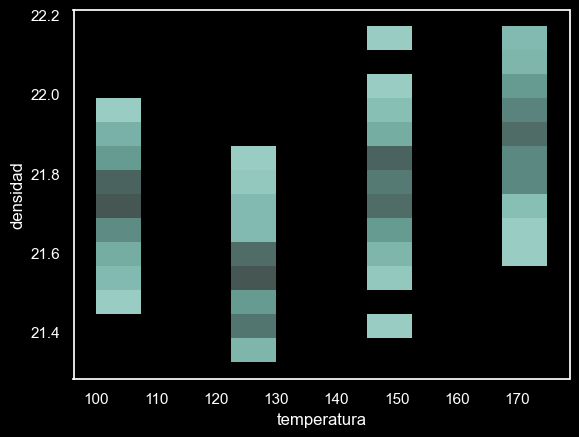

In [27]:
# crea una instancia de la clase Pruebas_parametricas para realizar un análisis ANOVA
# "temperatura" es la variable categórica que define los grupos
# "densidad" es la variable numérica sobre la cual se evaluarán las diferencias entre los grupos
anova_test = sa.Pruebas_parametricas("temperatura", "densidad", df_2)

# realiza el análisis ANOVA para comprobar si existen diferencias significativas entre los grupos
anova_test.test_anova()

# crea un histograma bidimensional para visualizar la relación entre 'temperatura' y 'densidad'
sns.histplot(data=df_2, x='temperatura', y='densidad')

# muestra el gráfico generado
plt.show()